# Logistic Regression

## Classification

**Classification** is the task of predicting a discrete category rather than a continuous value. This means that instead of forecasting a number (like price or temperature), you are determining the category or class an observation belongs to.

### Key Examples of Classification

1. **Spam Detection:** Determine whether an email is spam.
  - **Classes:** `Yes` (spam) or `No` (not spam)
  
2. **Fraud Detection:** Identify if a transaction is fraudulent.
  - **Classes:** `Yes` (fraudulent) or `No` (legitimate)

3. **Medical Diagnosis:** Assess if a tumor is malignant.
  - **Classes:** `Yes` (malignant) or `No` (benign)

> **Tip:** When dealing with classification problems, think about whether the target output is categorical (distinct classes) rather than numerical. This distinction is crucial in selecting the right model and evaluation metric.

### Binary Classification

Binary Classification is a specific type of classification where there are only **two possible outcomes**. This is often the scenario in many real-world applications.

### Binary Classification Breakdown:
- **0 (Negative class):** Represents the absence of a property.  
  - **Example:** In medical diagnostics, `0` might represent a benign tumor.

- **1 (Positive class):** Represents the presence of a property.  
  - **Example:** In fraud detection, `1` might indicate a fraudulent transaction.

> **Medical Diagnosis:** If a model outputs a probability of 0.8 for a malignant tumor, you can classify it as malignant (class 1) by using a threshold (commonly 0.5).

### Logistic Regression

**Logistic Regression** is a widely used algorithm for classification problems, particularly binary classification. Despite the name "regression," it is primarily used for classification tasks.

- Predicts the probability that a given input belongs to a specific category.
- The output is then mapped to a class label (0 or 1) based on a threshold.

## Sigmoid Function

The **Sigmoid Function** is used in Logistic Regression to map predictions to probabilities. It is an S-shaped curve that maps any real value to the range [0, 1]. The function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- $z$ is the input to the function. A linear combination of the input features (a weighted some of features).
- $\sigma(z)$ is the output, which is the probability of the input data belonging to the positive class.

### Properties of Sigmoid  
| **Value of $z$**  | **$\sigma(z)$ Output** |
|--------------------|----------------|
| $z \to +\infty$  | $\sigma(z) \to 1$  |
| $z = 0$  | $\sigma(z) = 0.5$ |
| $z \to -\infty$  | $\sigma(z) \to 0$  |

The sigmoid function **compresses** any input $z$ into a probability range of **(0,1)**.

> **Note:** The point $z = 0$ is the midpoint of the curve, which is why logistic regression often uses 0.5 as a decision threshold.

In [2]:
import numpy as np

def sigmoid(z):
    """
    Applies the sigmoid function to the given z value.
    """

    return 1/(1 + np.exp(-z))
    

In [20]:
print(f"Sigmoid of z=10: {sigmoid(10)}")
print(f"Sigmoid of z=-10: {sigmoid(-10)}")
print(f"Sigmoid of z=0: {sigmoid(0)}")

np.set_printoptions(precision=3) 
z_tmp = np.arange(-10,11)
y = sigmoid(z_tmp)
print(np.c_[z_tmp, y])

Sigmoid of z=10: 0.9999546021312976
Sigmoid of z=-10: 4.5397868702434395e-05
Sigmoid of z=0: 0.5
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


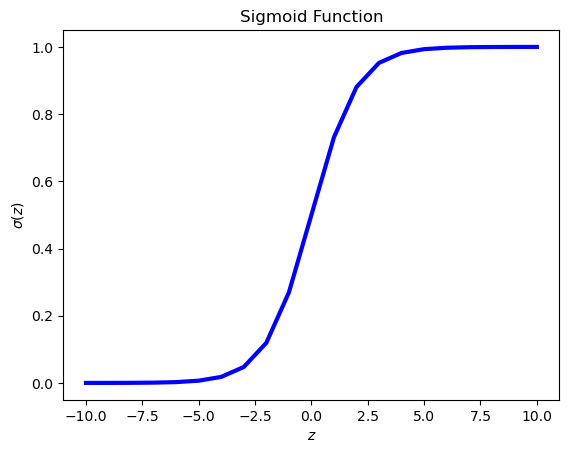

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(z_tmp, y, c="b", lw=3)
ax.set(ylabel="$\\sigma(z)$", xlabel="$z$", title="Sigmoid Function");

## Logistic Regression Model

The Logistic Regression model follows a 2-step process:
1. **Linear Combination:** Compute the linear combination of the input features and weights.

$$
z = w \cdot x + b
$$



2. **Sigmoid Activation:** Apply the sigmoid function to the linear combination to get the probability.

$$
f(x) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Therefore, the Logistic Regression model can be represented as:

$$
f(x) = \frac{1}{1 + e^{-(w \cdot x + b)}}
$$

Where:
- $f(x)$ is the predicted probability of the input data belonging to the positive class.
- $w$ is the weight vector.
- $x$ is the input feature vector.
- $b$ is the bias term.

The output of logistic regression, $f(x)$, represents the **probability** of a class label being **1**:  
$$
P(y = 1 \mid x) = f(x)
$$

## Classification Decision: Choosing $\hat{y}$

To convert the probability into a class label, we apply a **threshold**:

$$
\hat{y} =
\begin{cases} 
1 & \text{if } f(x) \geq 0.5 \\
0 & \text{if } f(x) < 0.5
\end{cases}
$$

- If $f(x) \geq 0.5$, predict **$y = 1$**.
- If $f(x) < 0.5$, predict **$y = 0$**.

This thresholding mechanism allows logistic regression to separate data into distinct classes.

## Decision Boundary

The decision boundary is the line that separates the classes in a classification problem. 

In Logistic Regression. It is the region where the model is **equally confident** about classifying a point as either class 0 or class 1.

the model predicts **$y = 1$** whenever:

$$
w \cdot x + b \geq 0
$$

and **$y = 0$** whenever:

$$
w \cdot x + b < 0
$$

Why? Because the sigmoid function outputs a value **greater than 0.5** when $w \cdot x + b \geq 0$ and a value **less than 0.5** when $w \cdot x + b < 0$.


## 🔍 Example: Visualizing a Linear Decision Boundary

Consider a dataset with **two features** ($x_1$, $x_2$). The logistic regression model computes:

$$
z = w_1 x_1 + w_2 x_2 + b
$$

If we assume:

$$
w_1 = 1, \quad w_2 = 1, \quad b = -3
$$

Then, the decision boundary occurs where:

$$
x_1 + x_2 - 3 = 0
$$

which simplifies to:

$$
x_1 + x_2 = 3
$$

- **Points where** $x_1 + x_2 > 3$ → Predict $y = 1$
- **Points where** $x_1 + x_2 < 3$ → Predict $y = 0$

## Non-Linear Decision Boundaries with Polynomial Features

We can incorporate polynomial features to allow for non-linear decision boundaries.

$$
z = w_1 x_1^2 + w_2 x_2^2 + b
$$
  
Given Parameters: $w_1 = 1$, $w_2 = 1$, $b = -1$
  
Set $z = 0$:

$$x_1^2 + x_2^2 - 1 = 0 \quad \Rightarrow \quad x_1^2 + x_2^2 = 1$$

This means the **Boundary Curve** is a circle with radius 1.
- **Outside the Circle ($x_1^2 + x_2^2 \geq 1$):** Predict $y = 1$.
- **Inside the Circle ($x_1^2 + x_2^2 < 1$):** Predict $y = 0$.

> **Tip:** By incorporating higher-order polynomial terms (e.g., $x_1x_2$, $x_1^2$, $x_2^2$, etc.), logistic regression can model complex decision boundaries such as ellipses or even more intricate shapes.

---

## Complex Decision Boundaries

We can combine multiple polynomial terms. This can yield highly non-linear decision boundaries, which might take forms like ellipses or other irregular shapes.
- **Without Polynomial Features:** Logistic regression will always produce a **linear (straight-line)** decision boundary.
- **With Polynomial Features:** The model is capable of fitting **complex boundaries** to better separate classes.

$$z = w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 (x_1x_2) + w_5 x_2^2$$


In [69]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

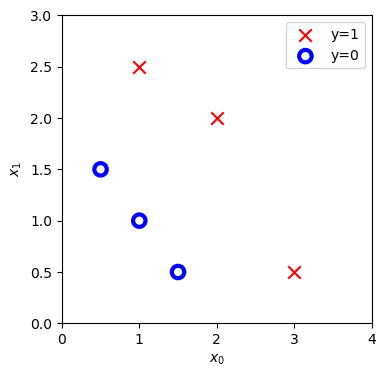

In [82]:
fig, ax = plt.subplots(figsize=(4,4))

# Find Indices of Positive and Negative Examples
pos_x0 = X[(y==1).flatten(), 0]
neg_x0 = X[(y==0).flatten(), 0]
pos_x1 = X[(y==1).flatten(), 1]
neg_x1 = X[(y==0).flatten(), 1]

ax.scatter(pos_x0, pos_x1, marker='x', s=80, c='red', label="y=1")
ax.scatter(neg_x0, neg_x1, marker='o', s=80, label="y=0", facecolors='none', edgecolors="blue", lw=3)
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
ax.axis([0, 4, 0, 3])
ax.legend()

Now let's plot the decision boundry on the above graph.

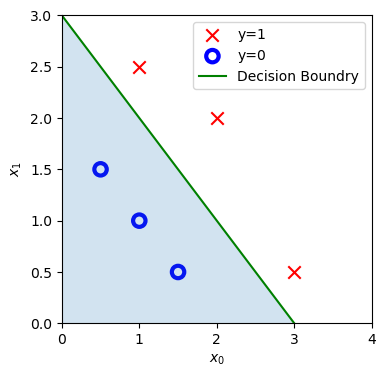

In [90]:
x0 = np.arange(0, 4)
x1 = 3 - x0

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(pos_x0, pos_x1, marker='x', s=80, c='red', label="y=1")
ax.scatter(neg_x0, neg_x1, marker='o', s=80, label="y=0", facecolors='none', edgecolors="blue", lw=3)
ax.set(ylabel="$x_1$", xlabel="$x_0$", xlim=(0, 4), ylim=(0, 3));
ax.plot(x0, x1, c="green", label="Decision Boundry")
ax.fill_between(x0,x1, alpha=0.2);
ax.legend()

# Cost Function

Remeber that in linear regression, we used the **Squared Error Cost Function:**

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f(x^{(i)}) - y^{(i)} \right)^2
$$

- **Properties:**
  1. **Convex:** Bowl-shaped (or "hammer-shaped"), ensuring a single global minimum.
  2. **Gradient Descent:** Converges reliably to the global minimum.

However, When applied to logistic regression (with $f(x) = \frac{1}{1 + e^{-(w \cdot x + b)}}$), the squared error cost function becomes **non-convex**. **Non-convexity** Leads to many local minima, making gradient descent unreliable and prone to getting stuck.

## The Logistic Loss Function

To address the non-convexity, we define a new loss function for logistic regression.

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}\big(f(x^{(i)}), y^{(i)}\big)
$$

> This notation means that the overall cost is the average of the individual losses from all training examples.

### Loss Function per Training Example

**For $y = 1$:**

$$
\mathcal{L}\big(f(x), 1\big) = -\log\big(f(x)\big)
$$

**For $y = 0$:**

$$
\mathcal{L}\big(f(x), 0\big) = -\log\big(1 - f(x)\big)
$$

> The choice of the negative logarithm as the loss function is crucial because it transforms the cost surface into a convex shape, ensuring that gradient descent will converge to the global minimum.

---

## Intuition Behind the Logistic Loss Function

The logarithm function $\log(z)$ increases very slowly when $z$ is large and plunges steeply toward negative infinity as $z$ approaches 0.

By taking the negative logarithm, $-\log(z)$, we flip this behavior: the function becomes very small (near 0) when $z$ is near 1, and it grows very large (approaches infinity) as $z$ approaches 0.

### When $y = 1$
- **Ideal Prediction:** If $f(x)$ is close to 1, the loss $-\log(f(x))$ is very small (near 0).
- **Poor Prediction:** If $f(x)$ is close to 0, the loss becomes very high (approaching infinity), penalizing the model heavily.
  
**Graphical Insight:**  
The graph of $-\log(f(x))$ for $y = 1$ shows:
- A minimum at $f(x) = 1$
- Rapid increase in loss as $f(x)$ moves away from 1

### When $y = 0$
- **Ideal Prediction:** If $f(x)$ is close to 0, the loss $-\log(1 - f(x))$ is very small.
- **Poor Prediction:** If $f(x)$ is close to 1, the loss becomes very high (approaching infinity), again imposing a heavy penalty.

**Graphical Insight:**  The graph of $-\log(1 - f(x))$ for $y = 0$ shows:
- A minimum at $f(x) = 0$
- A steep increase in loss as $f(x)$ approaches 1

> Think of the loss function as a "reward and punishment" system. Correct predictions (probabilities near the true label) are "rewarded" with a low loss, while incorrect predictions incur a high "penalty" to encourage the model to correct its mistakes.

- **Convex Cost Function:** With this logistic loss function, the overall cost function becomes convex.
- **Why is Convexity Important?**
  - **Guarantee of Global Minimum:** Convex functions have one global minimum.
  - **Reliable Convergence:** Gradient descent will consistently find this global minimum.


# Simplified Loss Function

The simplified loss function for a given prediction $f(x)$ and target label $y$ is:

$$
\text{Loss}(f(x), y) = -y \log(f(x)) - (1-y) \log(1-f(x))
$$

Given that $y \in \{0, 1\}$, the loss function naturally separates into two cases without needing to write two separate equations.

## Why This Works?

This works because $y$ can **only** be either 0 or 1. 

**Case 1: When $y = 1$:**

When the true label is 1, the only term that contributes is $-\log(f(x))$, penalizing predictions that are far from 1.

$$
y = 1 \quad \Rightarrow \quad 1-y = 0
$$

The loss function reduces to:

$$
\text{Loss}(f(x), 1) = -1 \cdot \log(f(x)) - 0 \cdot \log(1-f(x)) = -\log(f(x))
$$

**Case 2: When $y = 0$:**

When the true label is 0, the only term that matters is $-\log(1-f(x))$, penalizing predictions that are far from 0.

$$
y = 0 \quad \Rightarrow \quad 1-y = 1
$$

The loss becomes:

$$
\text{Loss}(f(x), 0) = -0 \cdot \log(f(x)) - 1 \cdot \log(1-f(x)) = -\log(1-f(x))
$$

---

## The Cost Function

The cost function provides a single metric that measures how well the logistic regression model is performing over the entire training dataset.

- When comparing two decision boundaries:
    - A **better fitting** decision boundary (e.g., indicated in blue) will have a **lower cost**.
    - A **worse fitting** decision boundary (e.g., indicated in magenta) will have a **higher cost**.

The cost function, denoted as $J$, is defined as the average loss over $m$ training examples:

$$
J = \frac{1}{m} \sum_{i=1}^m \text{Loss}(f(x^{(i)}), y^{(i)})
$$


Substitute the loss function:

$$
J = \frac{1}{m} \sum_{i=1}^m \left[-y^{(i)} \log(f(x^{(i)})) - (1-y^{(i)}) \log(1-f(x^{(i)}))\right]
$$

> The negative sign can be factored outside the summation for clarity.


### Statistical Justification: Maximum Likelihood Estimation (MLE)

The choice of this specific cost function is motivated by **Maximum Likelihood Estimation (MLE)**.
**MLE** is a statistical method for estimating the parameters of a model in a way that maximizes the probability (likelihood) of observing the given data. This formulation leads to a cost function that is **convex**, ensuring that gradient descent can efficiently find the global minimum.


# Gradient Descent and Parameter Updates

**Gradient Descent Algorithm:** Iteratively update parameters using the gradients (derivatives) of the cost function:
  
$$
\text{Parameter Update:} \quad \theta := \theta - \alpha \cdot \frac{\partial J}{\partial \theta}
$$

where:
- $\theta$ represents either $w_j$ or $b$.
- $\alpha$ is the learning rate.

---

### Derivative with Respect to $w$

$$
\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m \left( f(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

  - $m$: Number of training examples.
  - $x_j^{(i)}$: The $j$th feature of the $i$th training example.
  - $f(x^{(i)})$: Model prediction for the $i$th example.
  - **Interpretation:** The gradient is the average over all training examples of the product of the prediction error and the feature value.

### Derivative with Respect to $b$

$$
  \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m \left( f(x^{(i)}) - y^{(i)} \right)
$$

- Note: There is no feature multiplier because $b$ is a bias term.

---

## Gradient Descent Update Rules for Logistic Regression

- **Updating Each Parameter Simultaneously:** First, compute the gradients for all parameters, and then update all parameters at the same time.
- **Update Equations:**

For each weight $w_j$:

$$
w_j := w_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^m \left( f(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

For the bias $b$:

$$
b := b - \alpha \cdot \frac{1}{m} \sum_{i=1}^m \left( f(x^{(i)}) - y^{(i)} \right)
$$

---

## Comparison with Linear Regression

- Both linear regression and logistic regression use the same gradient descent update formulas.
  
- The key difference is the model prediction function. In linear regression:

$$
f(x) = w^T x + b
$$

In logistic regression: 

$$
f(x) = \sigma(w^T x + b)
$$

**Implication:** Despite the similar update rules, the use of the sigmoid function in logistic regression makes it a fundamentally different algorithm suited for classification rather than regression.

---

### Convergence Monitoring

As with linear regression, you can monitor the cost function $J(w, b)$ over iterations to ensure that gradient descent is converging to a minimum.

### Vectorization

**Speeding Up Computation:** Instead of updating one parameter at a time, you can leverage vectorized implementations (e.g., using NumPy in Python) to perform simultaneous updates more efficiently.

### Feature Scaling

- Ensures that all features are on a similar scale (e.g., between -1 and +1) to help gradient descent converge faster.
- Feature scaling is just as critical in logistic regression as it is in linear regression.
